# Red Wine Quality Prediction

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

# Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

# Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

In [1]:
import pandas as pd

In [2]:
wine=pd.read_csv('Red wine quality prediction.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# About the Columns:

1.Fixed acidity:
    The predominant fixed acids found in wines are tartaric, malic, citric, and succinic. ... Wines produced from cool climate grapes are high in acidity and thus taste sour. These high-acid wines can be treated to reduce the acidity, either by neutralizing agents, or by malo-lactic fermentation.
    
2.Volatile acidity:
    Volatile acidity (VA) is a measure of the wine's gaseous acids that contributes to the smell and taste of vinegar in wine.
    
3.Citirc acid:
    A sharp-tasting crystalline acid present in the juice of lemons and other sour fruits. It is made commercially by the fermentation of sugar and used as a flavouring and setting agent.
    
4.Residual sugar:
    Residual sugar (or RS) refers to the natural grape sugars left over in a wine after the alcoholic fermentation is complete. It is measured in grams per liter. The amount of residual sugar will vary in different types of wine depending on the varietal and style.
    
5.Chlorides:
    It significantly contributes the wine's sensory characteristics, affecting color, clearness, flavor and aroma.Therefore, moderate to large concentrations of chlorides and sodium might give the wine a salty flavor which may turn way potential consumers.
    
6.Free sulfur dioxide:
    Sulfur Dioxide (SO2) is the most common chemical compound used in winemaking. ... Sulfur serves two main purposes. It prevents the wine from reacting with oxygen which can cause browning and off-odors (oxidation), and it inhibits the growth of bacteria and undesirable wild yeasts in the grape juice and wine.
    
7.Total Sulfur dioxide:
    Total Sulfur Dioxide (TSO2) is the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars.
    
8.Density:
    Density is the mass per unit volume of wine or must at 20°C. It is expressed in. grams per milliliter, and denoted by the symbol ρ 20°C.
    
9.pH:
    PH is the measure of the degree of relative acidity versus the relative alkalinity of any liquid, on a scale of 0 to 14, with 7 being neutral. Winemakers use pH as a way to measure ripeness in relation to acidity. Low pH wines will taste tart and crisp, while higher pH wines are more susceptible to bacterial growth.
    
10.Sulphates:
    Sulfites are a food preservative widely used in winemaking, thanks to their ability to maintain the flavor and freshness of wine. While they're found in many foods and beverages, they're particularly associated with a long list of side effects related to wine consumption, including the dreaded wine-induced headache.
    
11.Alcohol:
    Alcohol by volume, or ABV, is the amount of ethanol in a given volume of liquid, expressed as a percentage. ABV is the global standard of measurement for alcohol content. The range of ABV for unfortified wine is about 5.5% to 16%, with an average of 11.6%.
    
12.Quality:
    Wine quality refers to the factors that go into producing a wine, as well as the indicators or characteristics that tell you if the wine is of high quality.
    
Quality is the target/output column.

In [4]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [26]:
wine['quality']=wine['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [27]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

# EDA

Using distplot and scatter plot let's see how data is distributed and analyze the relationship.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

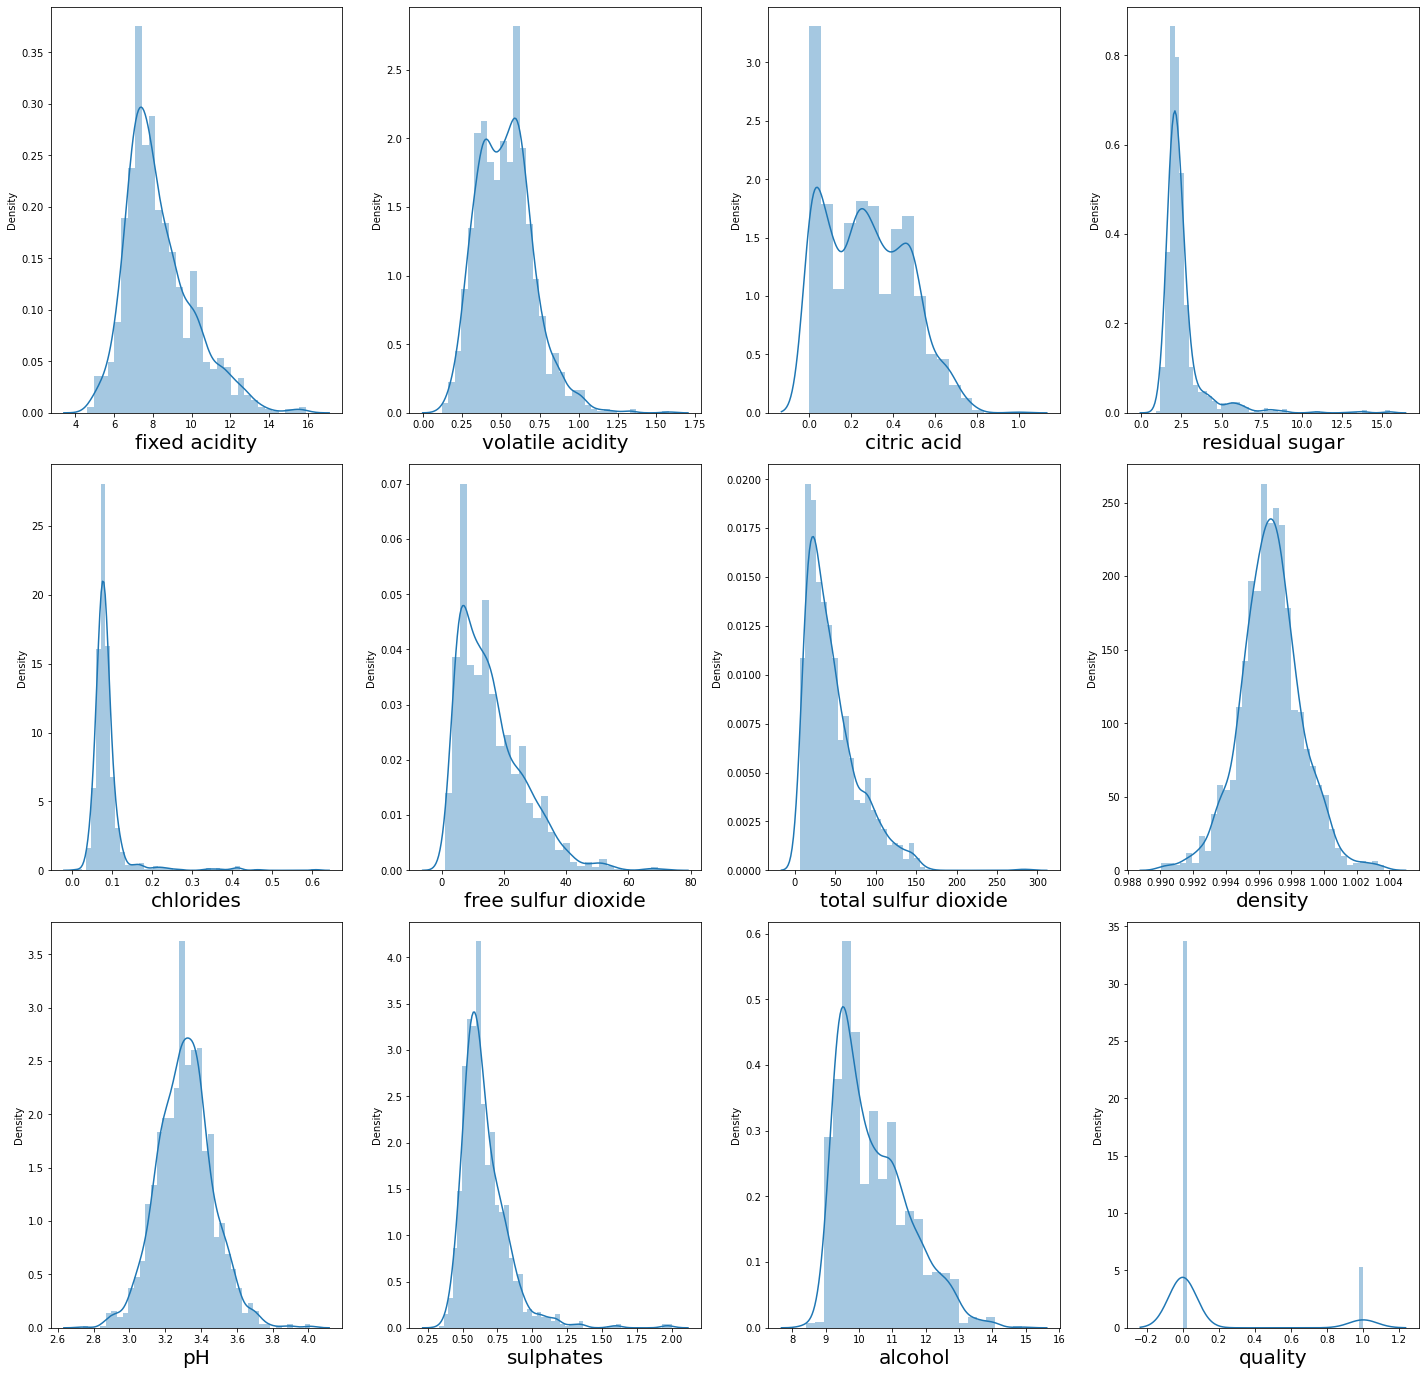

In [95]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in wine:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(wine[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Here we can see building blocks are properly distributed within the normalised curve, and there doesn't seem any skewness.

# Correlation:

In [12]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [13]:
import matplotlib.pyplot as plt

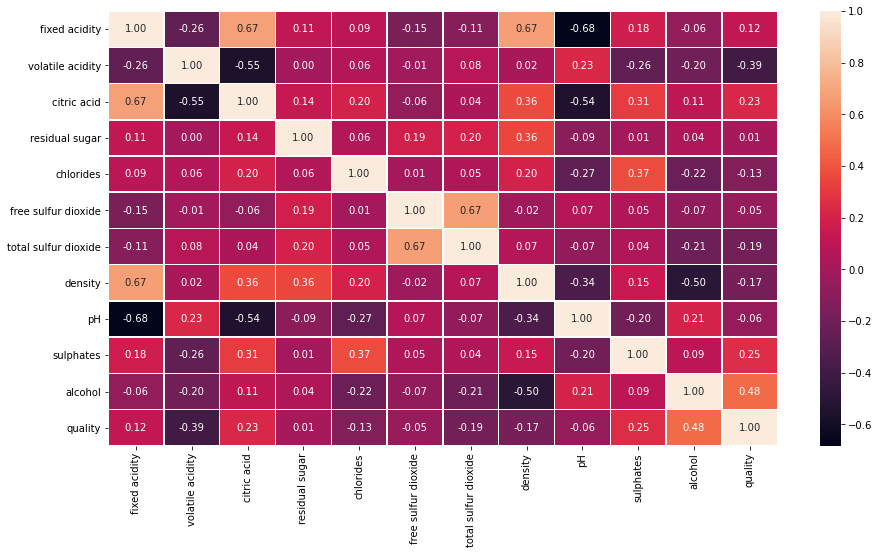

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(wine.corr(),annot=True,linewidth=0.5,linecolor='white',fmt='.2f')
plt.show()

# Outcome of Correlation:

All the columns are almost positively correlated with the target column.

Sulphates, Alcohol and Citric acid has 25, 48 and 23 percent correlation with target column which we can consider as strong bond. Fixed acidity is having 12 percent correlation with target column which can be considered as good bond. Remaining Residual sugar, volatile acidity, chlorides, free and total sulfur dioxides, density and pH are having negative correlation, with target column and can be considered as they won't have much effect on target column.

Max correlation: Alcohol

Min correlation: Volatile acidity

# Describing Datasets with Heatmap:

In [15]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


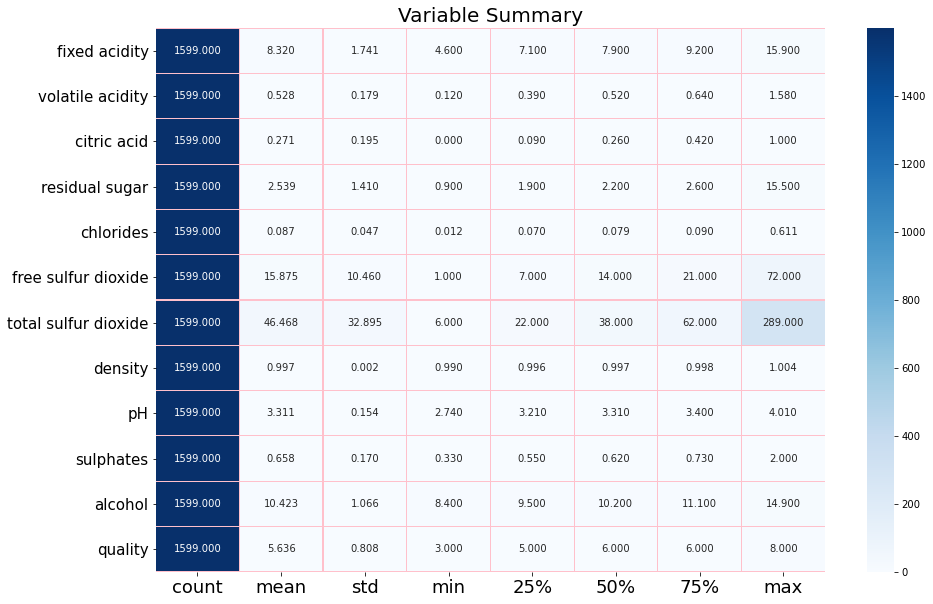

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(wine.describe().transpose(),annot=True,fmt='.3f',linewidth=0.1,cmap='Blues',linecolor='pink')
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.title('Variable Summary',fontsize=20)
plt.show()

# Outcome of describe of datasets:

From above we are determining mean, standard deviation, min. and max. value of each column, which will furthur help us in data cleaning.

Total number of rows and columns in dataset:

    1.1599 rows
    2.12 columns

Fixed acidity:
    
    1.Mean=8.32
    2.std=1.74
    3.max_value=15.90
    4.min_value=4.60
    
Volatile acidity:
    
    1.Mean=8.53
    2.std=0.18
    3.max_value=1.58
    4.min_value=0.12
    
Citric acid:
    
    1.Mean=0.27
    2.std=0.19
    3.max_value=1.00
    4.min_value=0.00
    
Residual sugar:
    
    1.Mean=2.54
    2.std=1.41
    3.max_value=15.50
    4.min_value=0.90
    
Chlorides:
    
    1.Mean=0.09
    2.std=0.05
    3.max_value=0.61
    4.min_value=0.01
    
Free sulfur dioxide:
    
    1.Mean=15.87
    2.std=10.46
    3.max_value=72.00
    4.min_value=1.00
    
Total sulfur dioxide:
    
    1.Mean=46.47
    2.std=32.90
    3.max_value=289.00
    4.min_value=6.00
    
Density:
    
    1.Mean=1.00
    2.std=0.00
    3.max_value=1.00
    4.min_value=0.99
    
pH:
    
    1.Mean=3.31
    2.std=0.15
    3.max_value=4.01
    4.min_value=2.74
    
Sulphates:
    
    1.Mean=0.66
    2.std=0.17
    3.max_value=2.00
    4.min_value=0.33
    
Alcohol:
    
    1.Mean=10.42
    2.std=1.07
    3.max_value=14.90
    4.min_value=8.40
    
Quality:
    
    1.Mean=5.64
    2.std=0.81
    3.max_value=8.00
    4.min_value=3.00
    
Quality is our target column.

# Using subplot and distplot to check data are normalised or not, considering mean values.

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

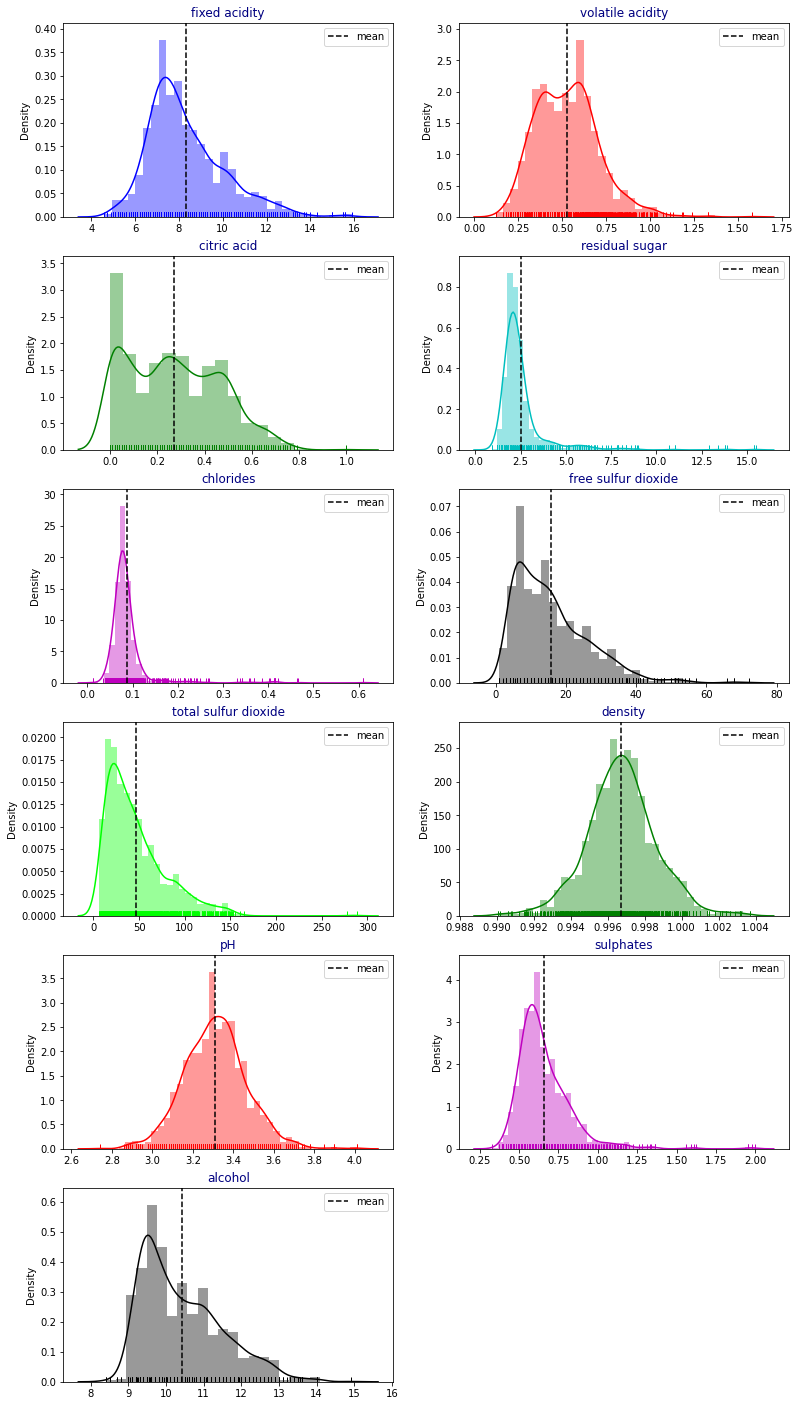

In [189]:
import itertools

cols=['fixed acidity',
     'volatile acidity',
     'citric acid',
     'residual sugar',
     'chlorides',
     'free sulfur dioxide',
     'total sulfur dioxide',
     'density',
     'pH',
     'sulphates',
     'alcohol']
length=len(cols)
cs=['b','r','g','c','m','k','lime','g','r','m','k','b']
fig=plt.figure(figsize=(13,25))
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(6,2,j+1)
    ax=sns.distplot(wine[i],color=k,rug=True)
    ax.set_facecolor('w')
    plt.axvline(wine[i].mean(),linestyle='--',label='mean',color='k')
    plt.legend(loc='best')
    plt.title(i,color='navy')
    plt.xlabel('')

# Observation:

From above we can see that data is not normalised for some features and we should proceed with the data cleaning.

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

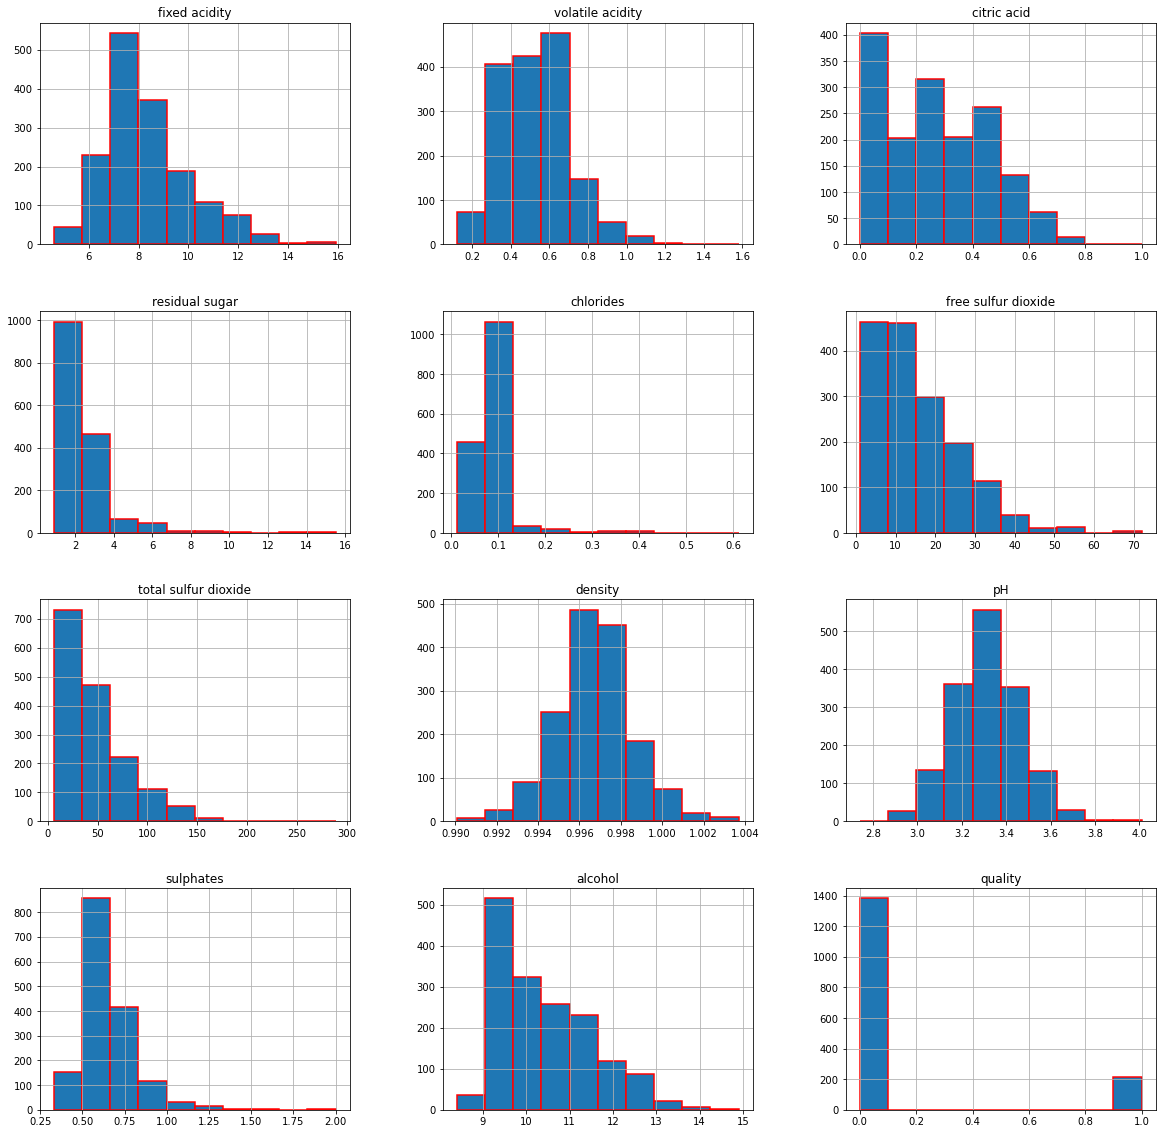

In [98]:
wine.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

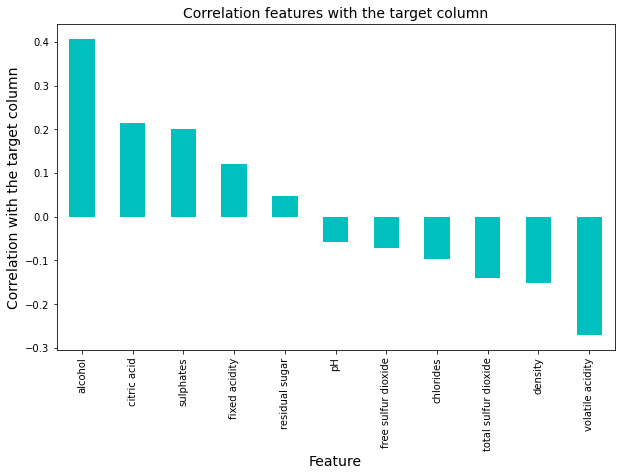

In [100]:
plt.figure(figsize=(10,6))
wine.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation features with the target column',fontsize=14)
plt.show()

In [101]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

None of the columns is having NaN or NaT value.

In [102]:
wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

# Skewness:

We are taking Skewness threshold as +/-0.5. From the following observation, the columns falls under high skewness:

Fixed acidity, skewness=0.982751, Volatile acidity, skewness=0.671593, residual sugar, skewness=4.540655, chlorides, skewness=5.680347, free sulfur dioxide, skewness=1.250567, total sulfur dioxide, skewness=1.515531, sulphates, skewness=2.428672, alcohol, skewness=0.860829

In [103]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From above we can have columns datatype and memory used by the dataframe.

# Outliers Checking:

To check outliers we are box plot.

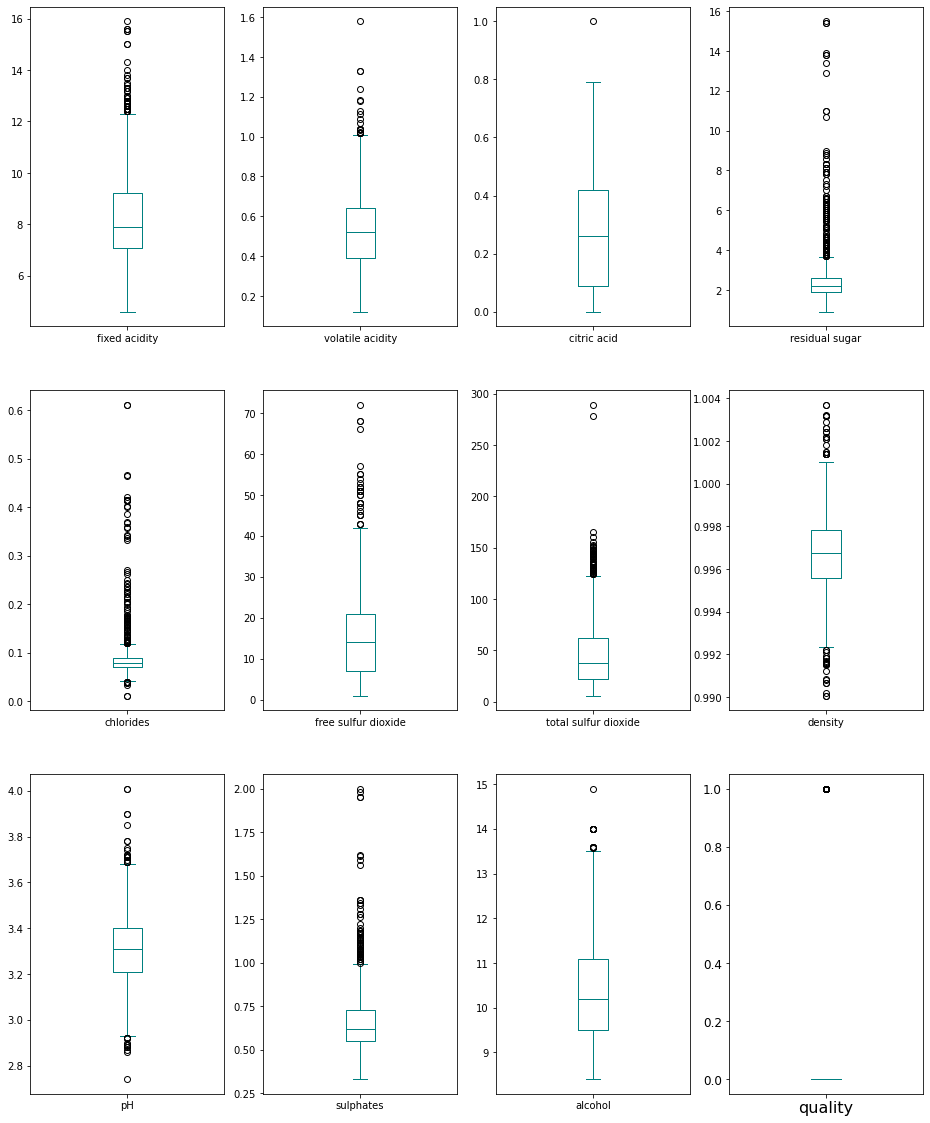

In [29]:
wine.plot(kind='box',subplots=True,layout=(3,4),figsize=(16,20),color='Teal')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.show()

From above we can see that columns ['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates']has more outliers, while columns ['volatile acidity','citric acid','alcohol']have less outliers and our target column 'quality' has no outliers.

# Removing outliers:

Checking the percentage of data falling under outliers:

In [104]:
from scipy.stats import zscore
import numpy as np

In [105]:
z=np.abs(zscore(wine))
z.shape

(1599, 12)

In [106]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

In [107]:
wine_new=wine[(z<3).all(axis=1)]
print(wine.shape)
print(wine_new.shape)

(1599, 12)
(1458, 12)


# Percentage Data loss

In [108]:
loss_percent=(1599-1451)/1599*100
print(loss_percent)

9.255784865540964


Since percentage of outliers is more than 5 percent.

We will try for IQR.

In [109]:
Q1=wine.quantile(0.25)
Q3=wine.quantile(0.75)
IQR=Q3-Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  0.000000
dtype: float64


In [110]:
wine_new1=wine[-((wine<(Q1-1.5*IQR)) |(wine>(Q3 + 1.5 * IQR))).any(axis=1)]
print(wine_new1.shape)

(1047, 12)


In [111]:
percentage_loss=(1599-1179)/1599*100
print(percentage_loss)

26.26641651031895


Since the percentage loss in zscore is less, we will go with zscore over IQR

# Dividing data in features and vectors:

In [112]:
x=wine_new.drop(columns=['quality'])
y=wine_new['quality']

In [113]:
x.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

Observing relationship between features and target vectors.

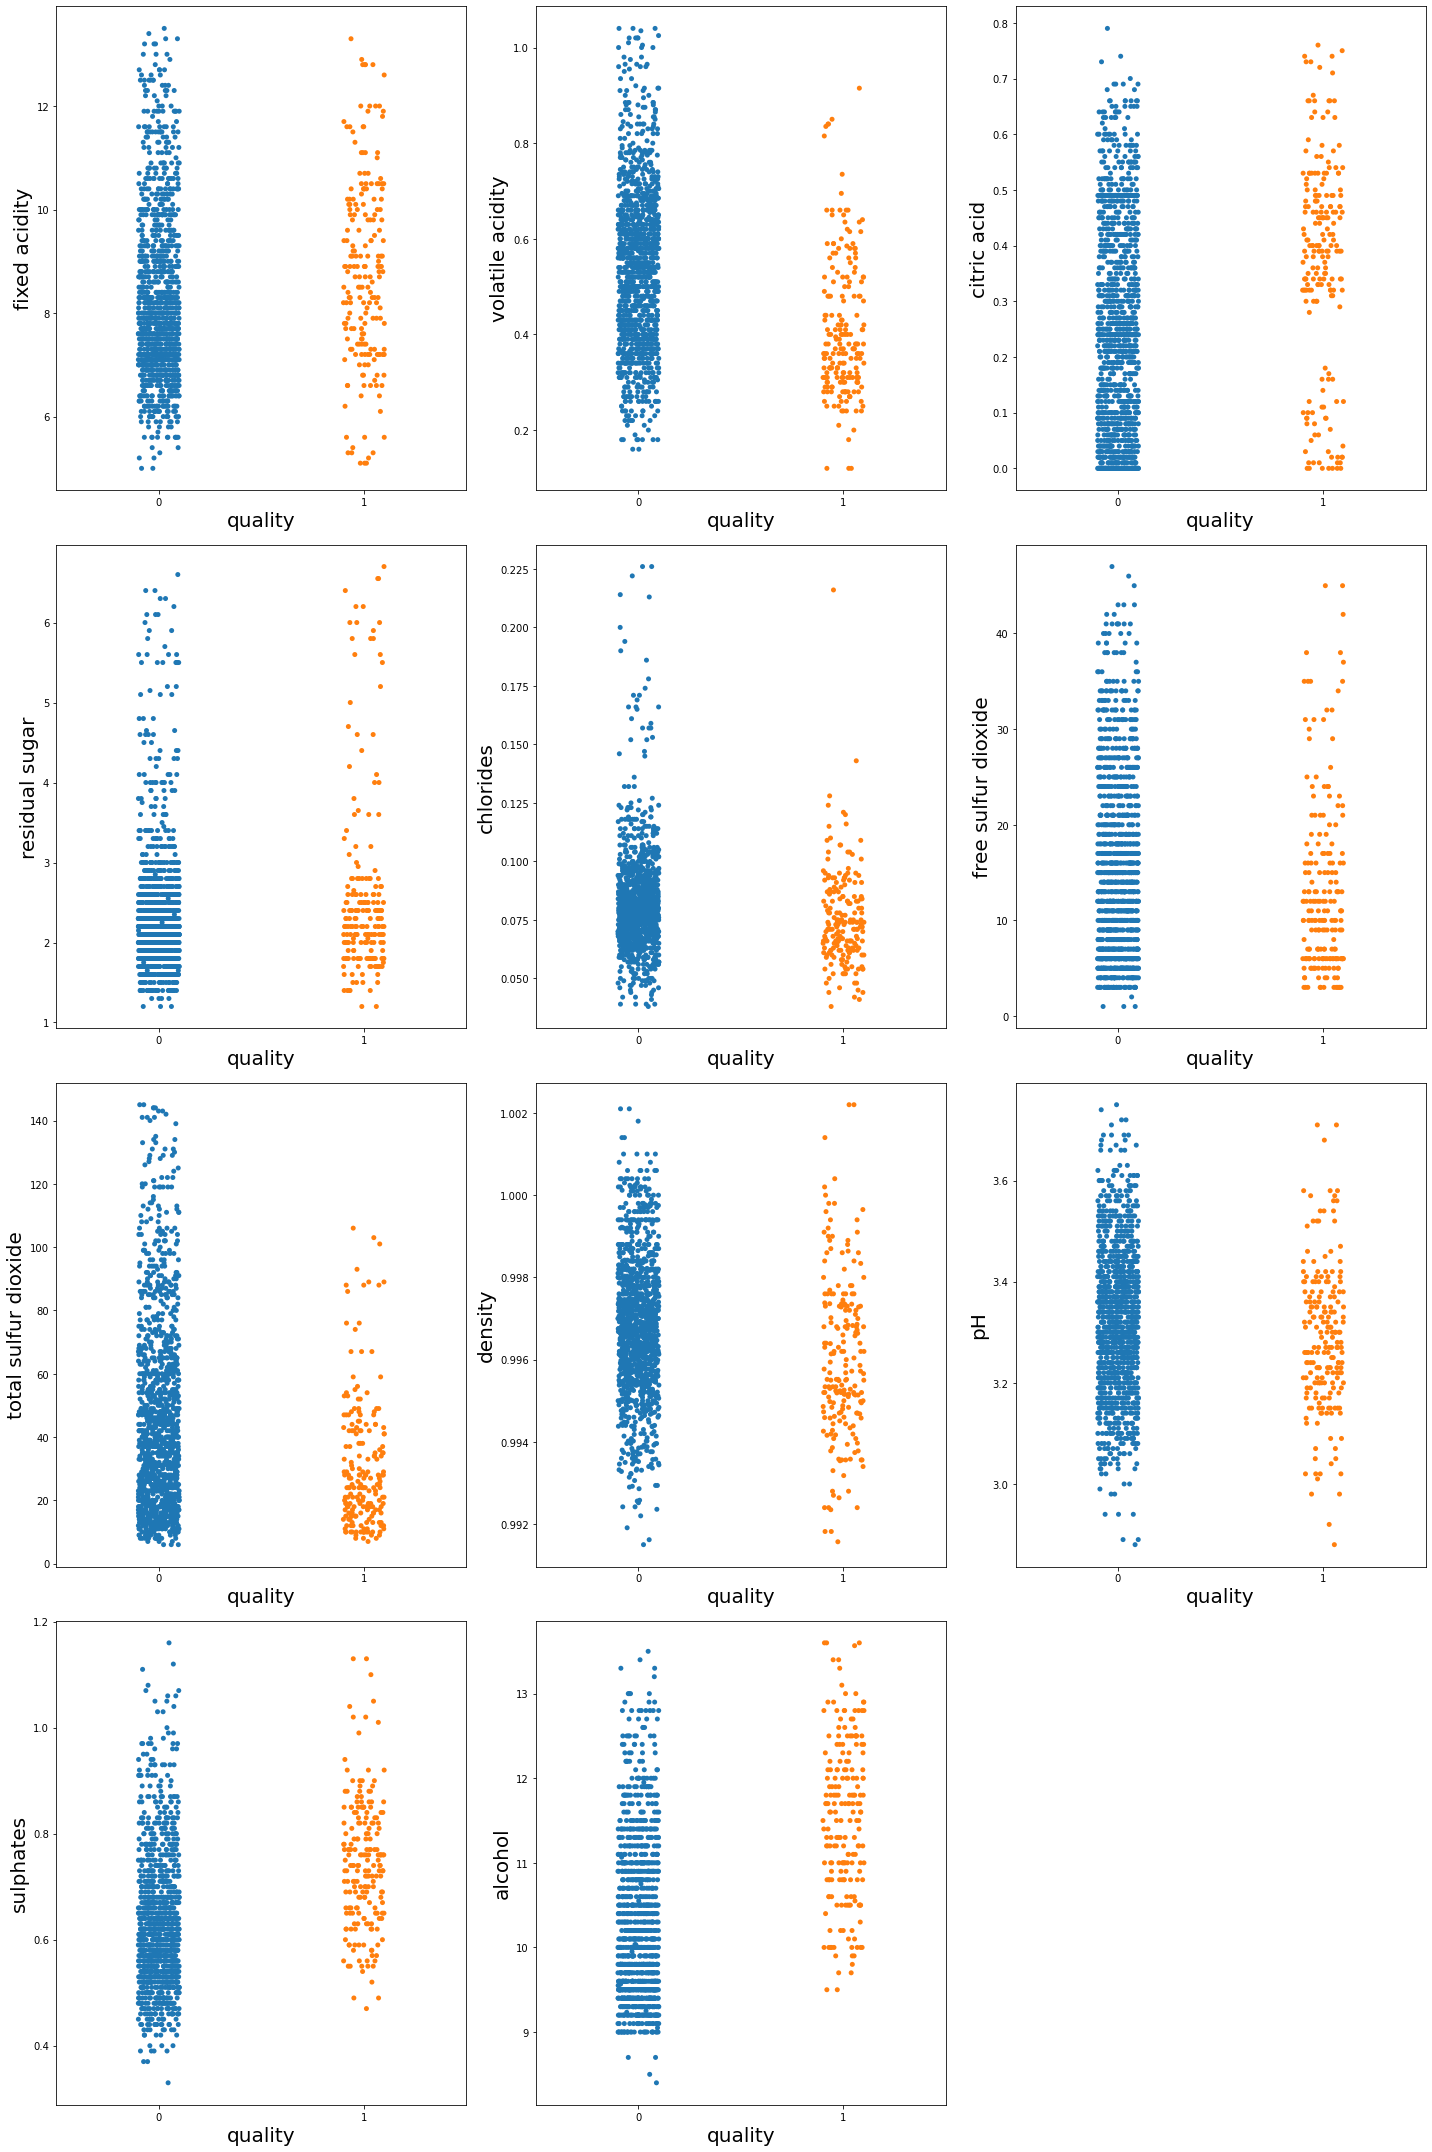

In [114]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=16:
        ax=plt.subplot(4,3,plotnumber)
        sns.stripplot(y,x[column])
        plt.xlabel('quality',fontsize=20)
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Transforming data to remove skewness:

In [115]:
wine_new.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 2.103030
dtype: float64

Outcome of Skewness the normal skewness is between +/-0.5.

Columns which are still not under the normal skewness range:

    fixed acidity
    residual sugar
    chlorides
    free sulfur dioxide
    total sulfur dioxide
    sulphates
    alcohol

Using power_transform to remove the skewness.

In [116]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.46910218,  1.04577542, -1.52186998, ...,  1.35995444,
        -0.58823037, -1.11232895],
       [-0.17212704,  1.90240432, -1.52186998, ..., -0.81842137,
         0.45352708, -0.52685366],
       [-0.17212704,  1.34481498, -1.24278981, ..., -0.38286787,
         0.22198916, -0.52685366],
       ...,
       [-1.45195519, -0.00716591, -0.66389542, ...,  0.74543779,
         0.9322481 ,  0.7428399 ],
       [-1.88631136,  0.75846579, -0.72514559, ...,  1.76196223,
         0.66861292, -0.03320546],
       [-1.77310975, -1.3354534 ,  1.0702808 , ...,  0.53744195,
         0.30109116,  0.7428399 ]])

Applying Standard Scaler

In [117]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
x_t

array([[-0.46910218,  1.04577542, -1.52186998, ...,  1.35995444,
        -0.58823037, -1.11232895],
       [-0.17212704,  1.90240432, -1.52186998, ..., -0.81842137,
         0.45352708, -0.52685366],
       [-0.17212704,  1.34481498, -1.24278981, ..., -0.38286787,
         0.22198916, -0.52685366],
       ...,
       [-1.45195519, -0.00716591, -0.66389542, ...,  0.74543779,
         0.9322481 ,  0.7428399 ],
       [-1.88631136,  0.75846579, -0.72514559, ...,  1.76196223,
         0.66861292, -0.03320546],
       [-1.77310975, -1.3354534 ,  1.0702808 , ...,  0.53744195,
         0.30109116,  0.7428399 ]])

In [118]:
y.value_counts()

0    1257
1     201
Name: quality, dtype: int64

In [119]:
print(x_t.shape)
print(y.shape)

(1458, 11)
(1458,)


# Applying SMOTE to balance the target column data:

In [120]:
from imblearn.over_sampling import SMOTE

In [121]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x_t,y)

In [122]:
np.bincount(y)

array([1257,  201], dtype=int64)

In [123]:
import numpy as np
trainx

array([[-0.46910218,  1.04577542, -1.52186998, ...,  1.35995444,
        -0.58823037, -1.11232895],
       [-0.17212704,  1.90240432, -1.52186998, ..., -0.81842137,
         0.45352708, -0.52685366],
       [-0.17212704,  1.34481498, -1.24278981, ..., -0.38286787,
         0.22198916, -0.52685366],
       ...,
       [-0.8850058 , -1.14668793, -0.28374203, ...,  0.07318154,
         0.59865435,  0.42698583],
       [-2.92426102, -0.16085666, -1.52186998, ...,  2.15973151,
         1.25454851,  2.02825852],
       [ 1.39534372, -1.07649091,  1.31943761, ..., -1.17104749,
         0.24401244,  0.70964783]])

In [124]:
print('After applying SMOTE',trainy.value_counts())
print('Before applying SMOTE',y.value_counts())

After applying SMOTE 0    1257
1    1257
Name: quality, dtype: int64
Before applying SMOTE 0    1257
1     201
Name: quality, dtype: int64


# Model building:

# Logistic Regression

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [126]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random state',i)
        print('Training r2_score is:-',accuracy_score(y_train,pred_train)*100)
        print('Testing r2_score is:-',accuracy_score(y_test,pred_test)*100)

At random state 71 The model performs very well
At random state 71
Training r2_score is:- 81.9492789656887
Testing r2_score is:- 81.90854870775348
At random state 78 The model performs very well
At random state 78
Training r2_score is:- 81.70064644455495
Testing r2_score is:- 81.70974155069582
At random state 110 The model performs very well
At random state 110
Training r2_score is:- 81.89955246146195
Testing r2_score is:- 81.90854870775348
At random state 155 The model performs very well
At random state 155
Training r2_score is:- 81.89955246146195
Testing r2_score is:- 81.90854870775348
At random state 161 The model performs very well
At random state 161
Training r2_score is:- 81.89955246146195
Testing r2_score is:- 81.90854870775348
At random state 174 The model performs very well
At random state 174
Training r2_score is:- 81.70064644455495
Testing r2_score is:- 81.70974155069582
At random state 175 The model performs very well
At random state 175
Training r2_score is:- 81.8995524614

In [127]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(trainx,trainy,random_state=354,test_size=0.2)

At random_state=354, we are getting best accuracy_score.

# Checking different model building techniques:

In [137]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [138]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train_b,y_train_b)
    svc.score(x_train_b,y_train_b)
    pred_svc=svc.predict(x_test_b)
    print(accuracy_score(y_test_b,pred_svc))
    print(confusion_matrix(y_test_b,pred_svc))
    print(classification_report(y_test_b,pred_svc))

In [139]:
svmkernel('rbf')

0.8946322067594433
[[215  32]
 [ 21 235]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       247
           1       0.88      0.92      0.90       256

    accuracy                           0.89       503
   macro avg       0.90      0.89      0.89       503
weighted avg       0.90      0.89      0.89       503



In [140]:
svmkernel('linear')

0.8190854870775348
[[199  48]
 [ 43 213]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       247
           1       0.82      0.83      0.82       256

    accuracy                           0.82       503
   macro avg       0.82      0.82      0.82       503
weighted avg       0.82      0.82      0.82       503



In [141]:
svmkernel('poly')

0.8409542743538767
[[217  30]
 [ 50 206]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       247
           1       0.87      0.80      0.84       256

    accuracy                           0.84       503
   macro avg       0.84      0.84      0.84       503
weighted avg       0.84      0.84      0.84       503



In [149]:
svmkernel('sigmoid')

0.7017892644135189
[[173  74]
 [ 76 180]]
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       247
           1       0.71      0.70      0.71       256

    accuracy                           0.70       503
   macro avg       0.70      0.70      0.70       503
weighted avg       0.70      0.70      0.70       503



Here we can see svmkernel('rbf') is having best accuracy_score

Checking for Decision tree and KNN.

In [142]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_b,y_train_b)
knn.score(x_train_b,y_train_b)
knn_pred=knn.predict(x_test_b)
print(accuracy_score(y_test_b,knn_pred))
print(confusion_matrix(y_test_b,knn_pred))
print(classification_report(y_test_b,knn_pred))

0.878727634194831
[[186  61]
 [  0 256]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       247
           1       0.81      1.00      0.89       256

    accuracy                           0.88       503
   macro avg       0.90      0.88      0.88       503
weighted avg       0.90      0.88      0.88       503



In [143]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train_b,y_train_b)
dtc.score(x_train_b,y_train_b)
dtc_pred=dtc.predict(x_test_b)
print(accuracy_score(y_test_b,dtc_pred))
print(confusion_matrix(y_test_b,dtc_pred))
print(classification_report(y_test_b,dtc_pred))

0.8886679920477137
[[217  30]
 [ 26 230]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       247
           1       0.88      0.90      0.89       256

    accuracy                           0.89       503
   macro avg       0.89      0.89      0.89       503
weighted avg       0.89      0.89      0.89       503



Here DTC is performing well than KNN, and for final model we will use svmkernel('rbf'), value.

# Applying Hyperparameter Tuning Grid:

In [144]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [150]:
grid_param={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf','poly','linear','sigmoid']}

In [151]:
grid_search=GridSearchCV(SVC(),param_grid=grid_param,refit=True,verbose=2)

In [152]:
grid_search.fit(x_train_b,y_train_b)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.3s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, 

[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   2.5s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   3.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   2.4s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   2.3s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   2.2s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             verbose=2)

In [153]:
print(grid_search.best_estimator_)

SVC(C=10, gamma=1)


Here we found the best estimator using GridSearch.

In [154]:
grid_search.best_score_

0.9825957063318642

In [155]:
svm=SVC(C=10,gamma=1)
svm.fit(x_train_b,y_train_b)

SVC(C=10, gamma=1)

In [156]:
svm.score(x_test,y_test)

0.9920477137176938

Great!! Our score has improved after using GridSearch.

In [159]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

In [160]:
svm=SVC(C=10,gamma=1)
svm.fit(x_train_b,y_train_b)
svm.score(x_train_b,y_train_b)
pred_svm=svm.predict(x_test_b)

svm_r=r2_score(y_test_b,pred_svm)
print('r2_score is:-',svm_r*100)

svm_score=cross_val_score(svm,x_t,y,cv=3)
svm_c=svm_score.mean()
print('cross_val_score:-',svm_c*100)

r2_score is:- 92.04516700404858
cross_val_score:- 86.83127572016461


In [161]:
print('Error:')
print('mean absolute error:',mean_absolute_error(y_test_b,pred_svm))
print('mean squared error:',mean_squared_error(y_test_b,pred_svm))
print('root mean square error',np.sqrt(mean_squared_error(y_test_b,pred_svm)))

Error:
mean absolute error: 0.019880715705765408
mean squared error: 0.019880715705765408
root mean square error 0.14099899186081227


In [164]:
#predict the value
print('predicted quality',pred_svm)
print('actual quality',y_test_b)

predicted quality [1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0
 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1
 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1
 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1
 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1
 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0
 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1
 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0
 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0
 1 1 1 

# AUC ROC Curve:

Area under the curve-Receiver operating characteristics.

In [165]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [169]:
fpr,tpr,thresholds=roc_curve(y_test_b,pred_svm)

In [170]:
fpr

array([0.        , 0.01619433, 1.        ])

In [182]:
tpr

array([0.       , 0.9765625, 1.       ])

In [183]:
thresholds

array([2, 1, 0], dtype=int64)

In [184]:
from sklearn.metrics import roc_curve,auc

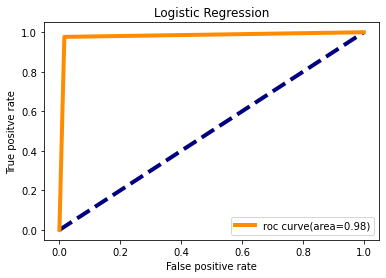

In [185]:
roc_curve=auc(fpr,tpr)
plt.plot([0,1],[0,1],color='navy',lw=4,linestyle='--')
plt.plot(fpr,tpr,label='roc curve(area=%0.2f)'%roc_curve,color='darkorange',lw=4)
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.title('Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Since the model without outliers performing well, we will select that dataframe.

# Model Saving:

In [186]:
import pickle
filename='inhouse_winequality_project.pk3'
pickle.dump(svm,open(filename,'wb'))

# Conclusion:

In [187]:
import numpy as np
a=np.array(y_test_b)
predicted=np.array(svm.predict(x_test_b))
wine_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
wine_com

,original,predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
498,0,0
499,0,0
500,0,0
501,1,1


# From the above table the model is predicted the values with 90-95 percent accuracy.